In [1]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [19]:
import matplotlib.pyplot as plt

In [24]:
from PIL import Image

In [2]:
import numpy as np

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [13]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy', 'categorical_accuracy'])

In [14]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 316us/step - loss: 1.6801 - acc: 0.5376 - categorical_accuracy: 0.5376 - val_loss: 0.6016 - val_acc: 0.8211 - val_categorical_accuracy: 0.8211
Epoch 2/5
60000/60000 [==============================] - 19s 313us/step - loss: 0.4294 - acc: 0.8724 - categorical_accuracy: 0.8724 - val_loss: 0.3073 - val_acc: 0.9074 - val_categorical_accuracy: 0.9074
Epoch 3/5
60000/60000 [==============================] - 19s 314us/step - loss: 0.2924 - acc: 0.9123 - categorical_accuracy: 0.9123 - val_loss: 0.2758 - val_acc: 0.9110 - val_categorical_accuracy: 0.9110
Epoch 4/5
60000/60000 [==============================] - 19s 315us/step - loss: 0.2319 - acc: 0.9298 - categorical_accuracy: 0.9298 - val_loss: 0.2084 - val_acc: 0.9357 - val_categorical_accuracy: 0.9357
Epoch 5/5
60000/60000 [==============================] - 19s 316us/step - loss: 0.1916 - acc: 0.9425 - categorical_accuracy: 0.9425 - 

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

In [10]:
def get_percentage(model, predictions, y_test):
    counter = 0.0
    for i in range(len(y_test)):
        if(np.argmax(y_test[i]) == np.argmax(predictions[i])):
            counter = counter + 1
    
    print str(counter / float(len(y_test))*100), '% accuracy'

In [15]:
predictions = model.predict(X_test)
get_percentage(model, predictions, y_test)

95.51 % accuracy


In [27]:
np.argmax(y_test[12])

9

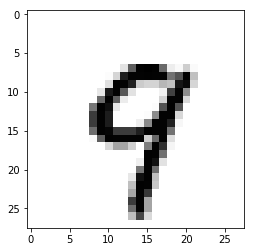

In [28]:
plt.imshow(X_test[12].reshape(28,28), cmap='Greys')

In [29]:
np.argmax(model.predict(X_test[12:13]))

9